# Udacity Nanodegree Student Reviews Analysis

In [1]:
import requests
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
response = requests.get("http://search.jiayuan.com/v2/index.php?key=&sex=f&stc=1:33,23:1&sn=default&sv=1&pt=163&ft=off&f=select&mt=d&p=1")
a = response.content
a = a.decode(encoding='UTF-8')

In [6]:
a

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<meta name="keywords" content="交友,同城婚恋交友,全国婚恋交友,网上交友,交友征婚,离异征婚,离异交友,交友照片,同城交友,同城相亲,同城约会吧,约会吧征婚照片,约会吧资料,约会吧照片,约会吧征婚,约会吧交友" />\r\n<meta name="Description" content="世纪佳缘交友征婚,交友,同城婚恋交友,全国婚恋交友,网上交友,交友征婚,离异征婚,离异交友,同城交友,同城相亲,婚恋交友一站式服务,世纪佳缘会员约会吧,同城约会吧年龄、身高、住所、学历、收入、兴趣爱好、生活状况、择偶条件等资料一应俱全，想在同城寻找合适的伴侣，征婚交友请选择世纪佳缘" />\r\n<title>交友_会员搜索_世纪佳缘交友网</title>\r\n<!--调用公用css-->\r\n<link href="http://images1.jyimg.com/w4/common/c/base.css" rel="stylesheet" type="text/css" />\r\n<link href="http://images1.jyimg.com/w4/search/v2_1/c/search.css" type="text/css" rel="stylesheet" />\r\n<script type=\'text/javascript\' src=\'http://images1.jyimg.com/w4/common/j/jquery.js\'></script>\r\n<script type=\'text/javascript\' src=\'http://images1.jyimg.com/w4/search/v2_

In [2]:
def getdata(degree,maxpage):  
    data = []
    count = 0
    for i in range(1,maxpage):
        response = requests.get("https://ratings-api.udacity.com/api/v1/reviews?node=%s&limit=5&rating_min=1&page=%s" % (degree,i))
        a = response.content
        a = a.decode(encoding='UTF-8')
        b = yaml.load(a)
        for i in b["reviews"]:
            data.append(i)
    print ("Done")
    return pd.DataFrame(data)

#nd008 = getdata("nd008",20)
#nd002 = getdata("nd002",70)
#nd803 = getdata("nd803",150)
#nd009 = getdata("nd009",150)
#nd000 = getdata("nd000",150)
#nd001 = getdata("nd001",150)
#nd004 = getdata("nd004",150)
#nd801 = getdata("nd801",150)
#nd003 = getdata("nd003",50)

#data = nd008.append(nd002).append(nd803).append(nd009).append(nd000).append(nd001).append(nd004).append(nd801).append(nd003)
#data.to_csv('ndreviews.csv',sep='\t', encoding='utf-8')

In [4]:
data = pd.read_csv('ndreviews.csv',sep='\t')

In [15]:
course_list = {"nd000":"intro to programming","nd001":"front-end web developer",
               "nd002":"data analyst","nd003":"ios developer","nd004":"full stack web developer",
               "nd008":"predictive analytics for business","nd009":"machine learning engineer",
               "nd801":"android developer","nd803":"android basics"}
data['nd_key_name'] = data['nd_key'].map(course_list)
data.head()

,Unnamed: 0,__v,_id,created_at,nd_key,rated_by,rating,rating_max,student_comment,updated_at,user_key,nd_key_name
0,0,0,58b7033630db860004ded140,2017-03-01T17:21:57.959Z,nd008,{'name': 'Alejandro R.'},5,5,Great program. During the course you´ll get in...,2017-03-01T17:21:58.809Z,5475719110,predictive analytics for business
1,1,0,58b218c303598f0004339d7e,2017-02-25T23:50:59.841Z,nd008,{'name': 'sanjay k.'},5,5,Great. A different field for me with my many y...,2017-02-25T23:52:35.698Z,9852356514,predictive analytics for business
2,2,0,58af035980e5530004124434,2017-02-23T15:44:27.146Z,nd008,{'name': 'Siraj S.'},5,5,To a large extent yes.,2017-02-23T15:44:25.457Z,380488986,predictive analytics for business
3,3,0,58ad4c9fb85bc5000425d491,2017-02-22T08:32:31.818Z,nd008,{'name': 'wafic f.'},5,5,That was my first online course ever and both ...,2017-02-22T08:32:31.534Z,8989028615,predictive analytics for business
4,4,0,58a60f3f5964aa00040f451f,2017-02-16T20:44:47.008Z,nd008,{'name': 'Alejandro R.'},5,5,"Great program! First, it gives you the foundat...",2017-02-16T20:44:47.555Z,5475719110,predictive analytics for business


In [6]:
group_by_rating = data.groupby(["nd_key_name"])["rating"].value_counts()

In [7]:
%matplotlib inline

## Rating analysis

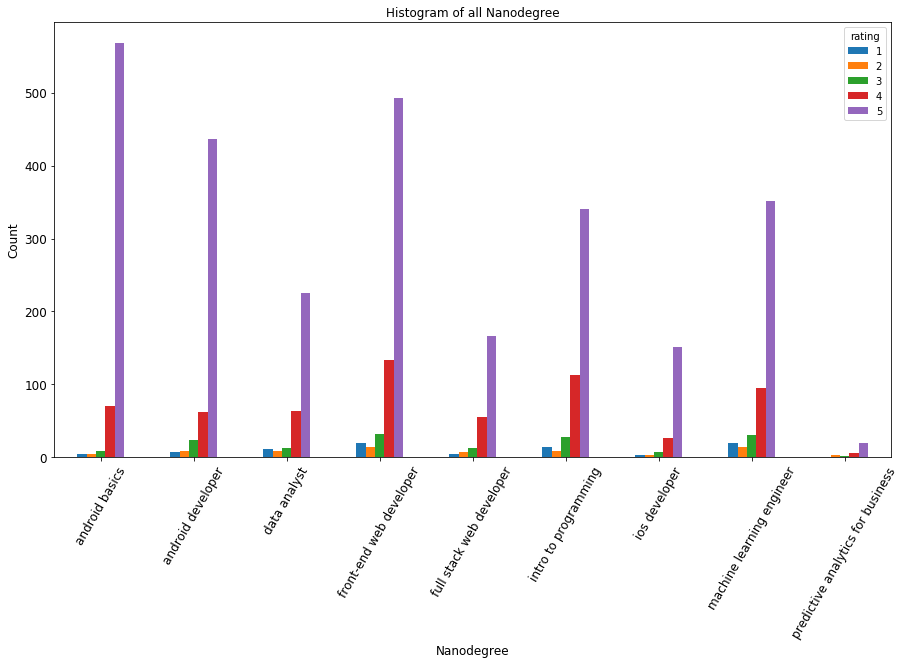

In [13]:
group_by_rating.unstack().plot.bar(figsize=(15, 8),rot=60,fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xlabel('Nanodegree',fontsize=12)
plt.title('Histogram of all Nanodegree')

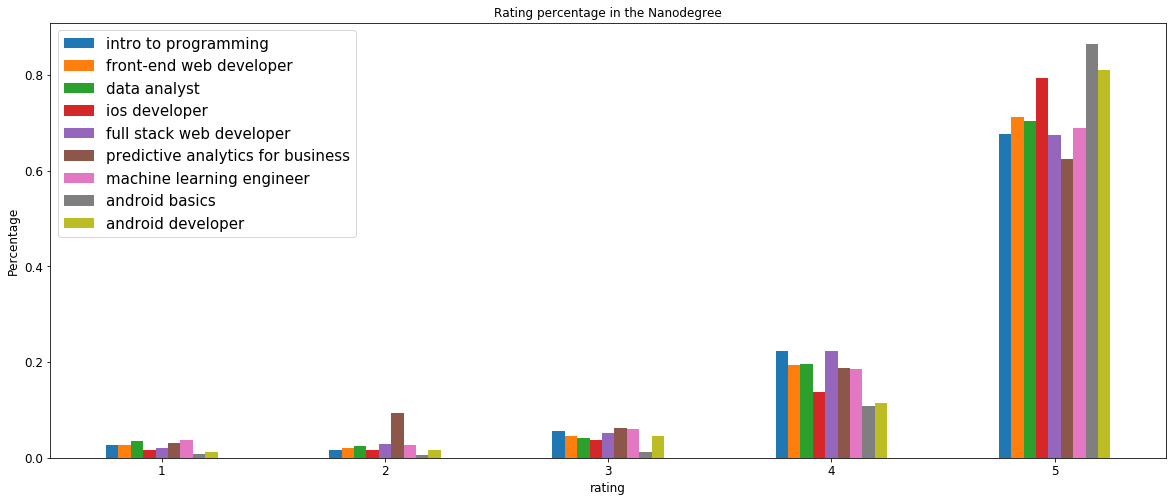

In [30]:
# calculate the rating by course
def compare_plot(degree,group = group_by_rating):
    data_rate = group[degree].sort_index()
    return (data_rate/data_rate.sum()).rename(degree)
x0 = compare_plot("intro to programming")
x1 = compare_plot("front-end web developer")
x2 = compare_plot("data analyst")
x3 = compare_plot("ios developer")
x4 = compare_plot("full stack web developer")
x5 = compare_plot("predictive analytics for business")
x6 = compare_plot("machine learning engineer")
x8 = compare_plot("android developer")
x7 = compare_plot("android basics")


test = pd.concat([x0,x1, x2,x3,x4,x5,x6,x7,x8], axis=1)
test.plot.bar(figsize=(20, 8),rot=0,fontsize=12)
plt.ylabel('Percentage',fontsize=12)
plt.xlabel('rating',fontsize=12)
plt.title('Rating percentage in the Nanodegree')
#plt.legend(course_listfull)
plt.legend(fontsize=15)

## Reviews text analysis

In [35]:
from collections import Counter
from nltk.corpus import stopwords
len(data["student_comment"])

3690

In [48]:
def text_frequency(degree):
    text = ""
    for i in data[data["nd_key_name"] == degree]["student_comment"]:
        text = i + " " + text
    stop = set(stopwords.words('english'))
    test = text.split()
    test_parse = [i for i in  test if i.lower() not in stop]
    return Counter(test_parse).most_common(10)

In [49]:
text_frequency("intro to programming")

[('course', 98),
 ('really', 93),
 ('like', 89),
 ('programming', 86),
 ('program', 81),
 ('great', 75),
 ('learn', 70),
 ('learning', 68),
 ('good', 62),
 ('would', 49)]

In [50]:
text_frequency("front-end web developer")

[('program', 148),
 ('course', 133),
 ('really', 101),
 ('great', 100),
 ('learning', 99),
 ('learn', 87),
 ('Udacity', 82),
 ('like', 81),
 ('web', 79),
 ('good', 76)]

In [51]:
text_frequency("data analyst")

[('data', 84),
 ('course', 57),
 ('program', 49),
 ('learning', 47),
 ('great', 46),
 ('really', 45),
 ('projects', 41),
 ('lot', 36),
 ('project', 33),
 ('would', 30)]

In [52]:
pos_sent = open("positive.txt").read()
positive_words=pos_sent.split('\n')

pos_sent2 = open("negative.txt").read()
negative_words=pos_sent2.split('\n')

In [53]:
def text_frequency(degree):
    text = ""
    for i in data[data["nd_key_name"] == degree]["student_comment"]:
        text = i + " " + text
    stop = set(stopwords.words('english'))
    test = text.split()
    test_parse = [i for i in  test if i.lower() not in stop]
    
    positive_count = 0
    negative_count = 0
    for word in test_parse:
        if word.lower() in positive_words:
            positive_count = positive_count+1
        if word.lower() in negative_words:
            negative_count = negative_count+1       
    pos_score = positive_count/len(test_parse)
    neg_score = negative_count/len(test_parse)
    
    return pos_score, neg_score

In [54]:
#text_frequency("data analyst")
final =[]
for i in course_list:
    final.append(((course_list[i],text_frequency(course_list[i])[0],text_frequency(course_list[i])[1])))
final

[('intro to programming', 0.11769099445155783, 0.02880921895006402),
 ('front-end web developer', 0.1171806865931975, 0.02457781653849203),
 ('data analyst', 0.12014690451206715, 0.027806925498426022),
 ('ios developer', 0.12380344607530312, 0.02169751116783663),
 ('full stack web developer', 0.10962126558456833, 0.025405786873676783),
 ('predictive analytics for business',
  0.10135135135135136,
  0.033783783783783786),
 ('machine learning engineer', 0.13712415130940833, 0.027885548011639186),
 ('android developer', 0.1208300792145487, 0.019636282494700435),
 ('android basics', 0.13877449145139148, 0.017222014226881317)]

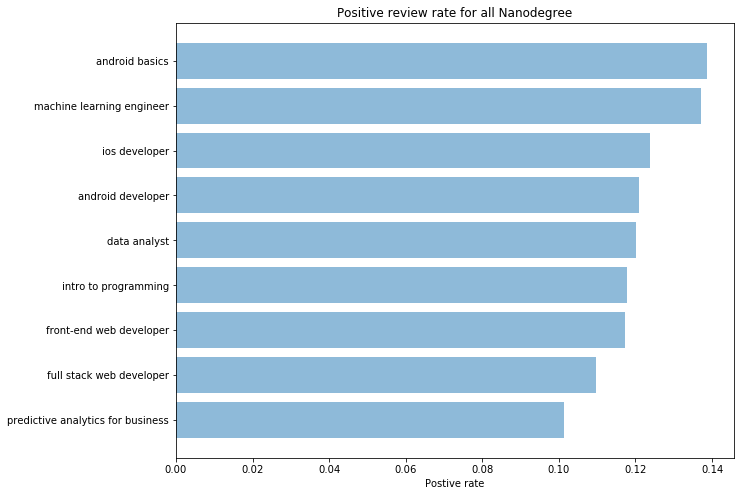

In [60]:
final.sort(key=lambda tup: tup[1],reverse=False)
degree = [i[0] for i in final]
y_pos = np.arange(len(degree))
pos_performance = [i[1] for i in final]
fig, ax = plt.subplots(figsize=(10, 8))
plt.barh(y_pos, pos_performance, align='center', alpha=0.5)
plt.yticks(y_pos, degree)
plt.xlabel('Postive rate')
plt.title('Positive review rate for all Nanodegree')
plt.show()

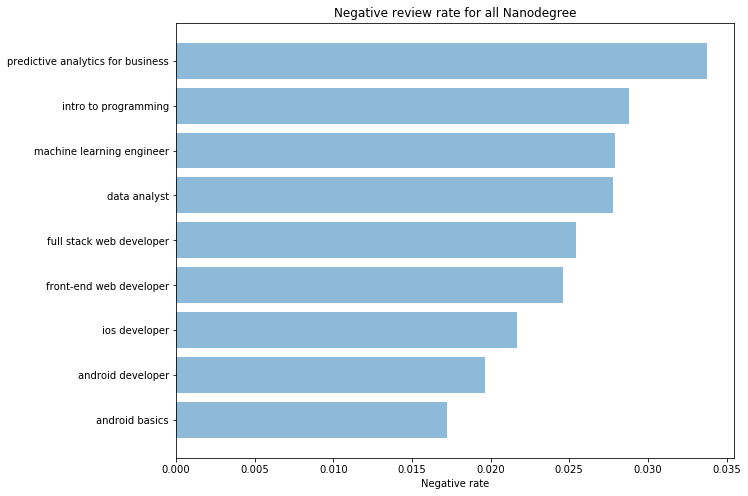

In [56]:
final.sort(key=lambda tup: tup[2],reverse=False)
degree = [i[0] for i in final]
y_pos = np.arange(len(degree))
neg_performance = [i[2] for i in final]
fig, ax = plt.subplots(figsize=(10, 8))
plt.barh(y_pos, neg_performance, align='center', alpha=0.5)
plt.yticks(y_pos, degree)
plt.xlabel('Negative rate')
plt.title('Negative review rate for all Nanodegree')
plt.show()